In [1]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
## Downloaded data sets
df = pd.read_csv('IRIS_Flower.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
## checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='sepal_width'>

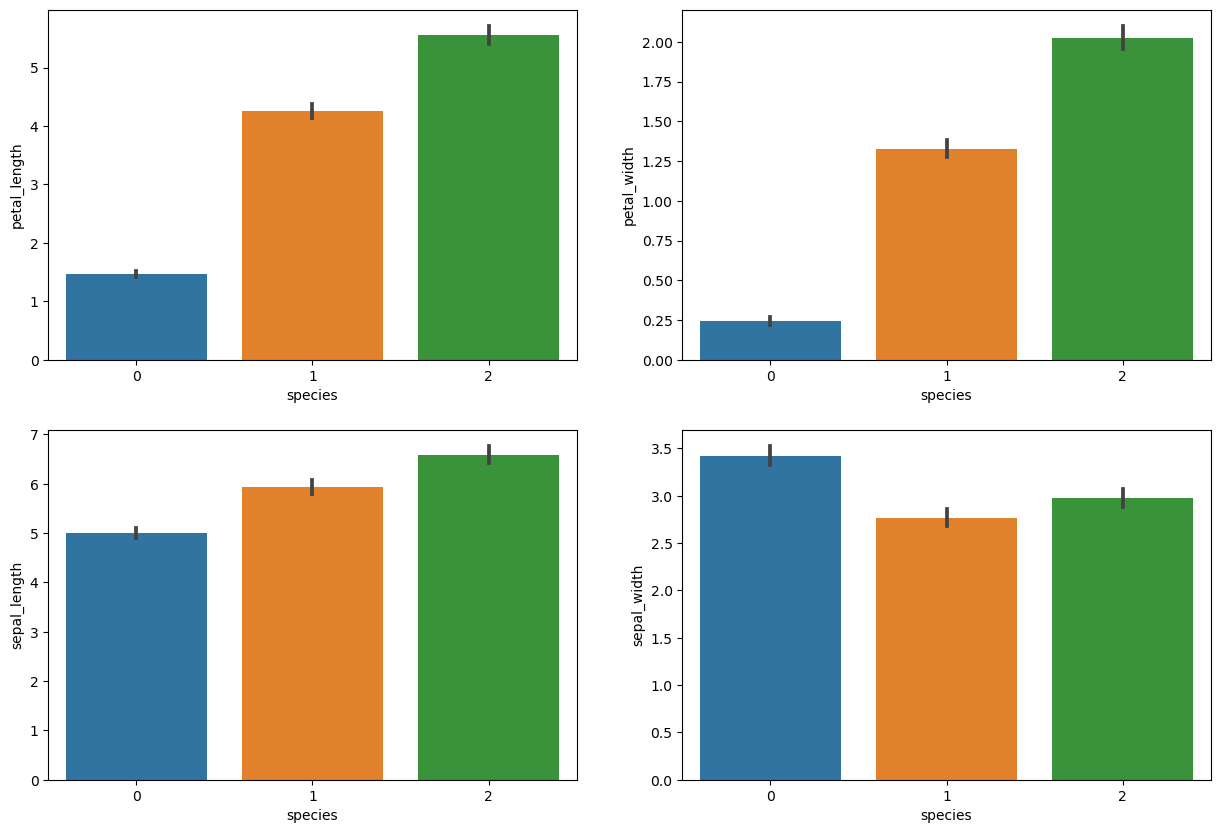

In [23]:
## visualize the data
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.barplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.barplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.barplot(x='species',y='sepal_width',data=df)

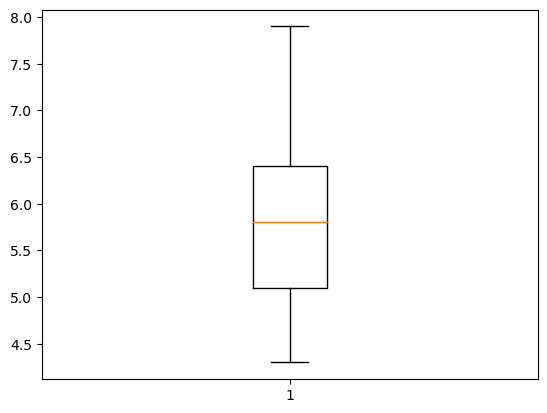

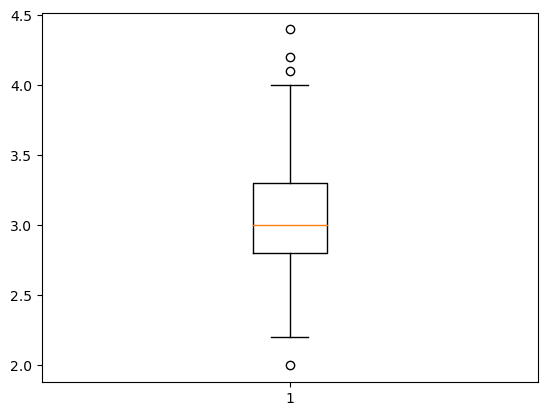

In [24]:
#Checking for outliers
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

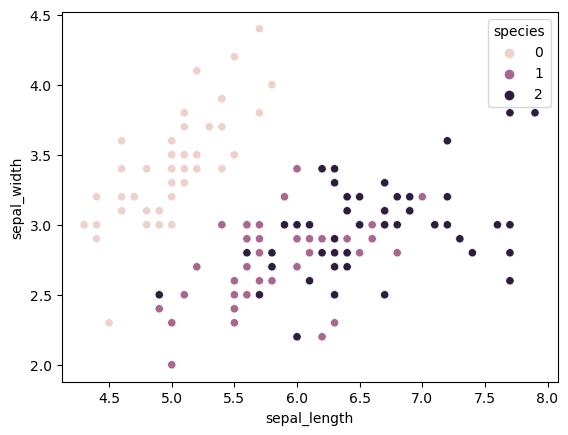

In [25]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',hue='species');

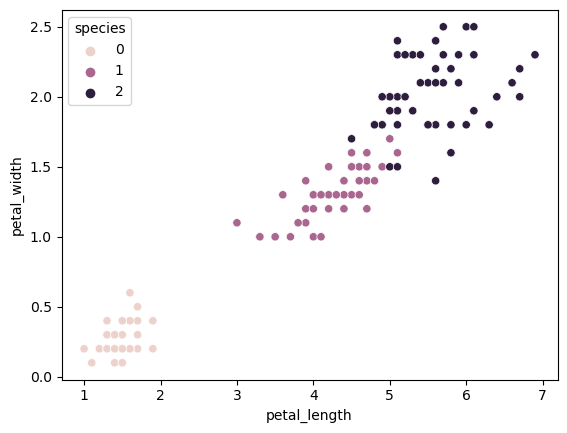

In [29]:
sns.scatterplot(data=df, x='petal_length', y='petal_width',hue='species');

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


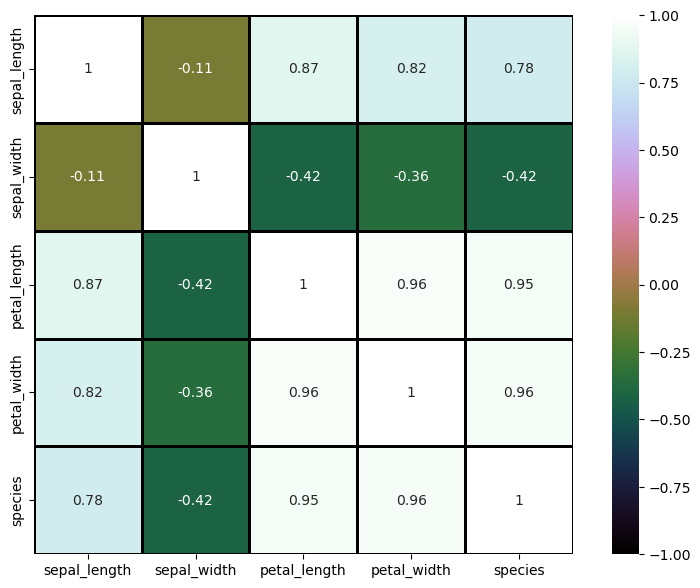

In [32]:
#from info() function its clear that each column has any value(non null)
print(df.isnull().sum())
#lets visualize
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"})

<Axes: xlabel='petal_width', ylabel='sepal_width'>

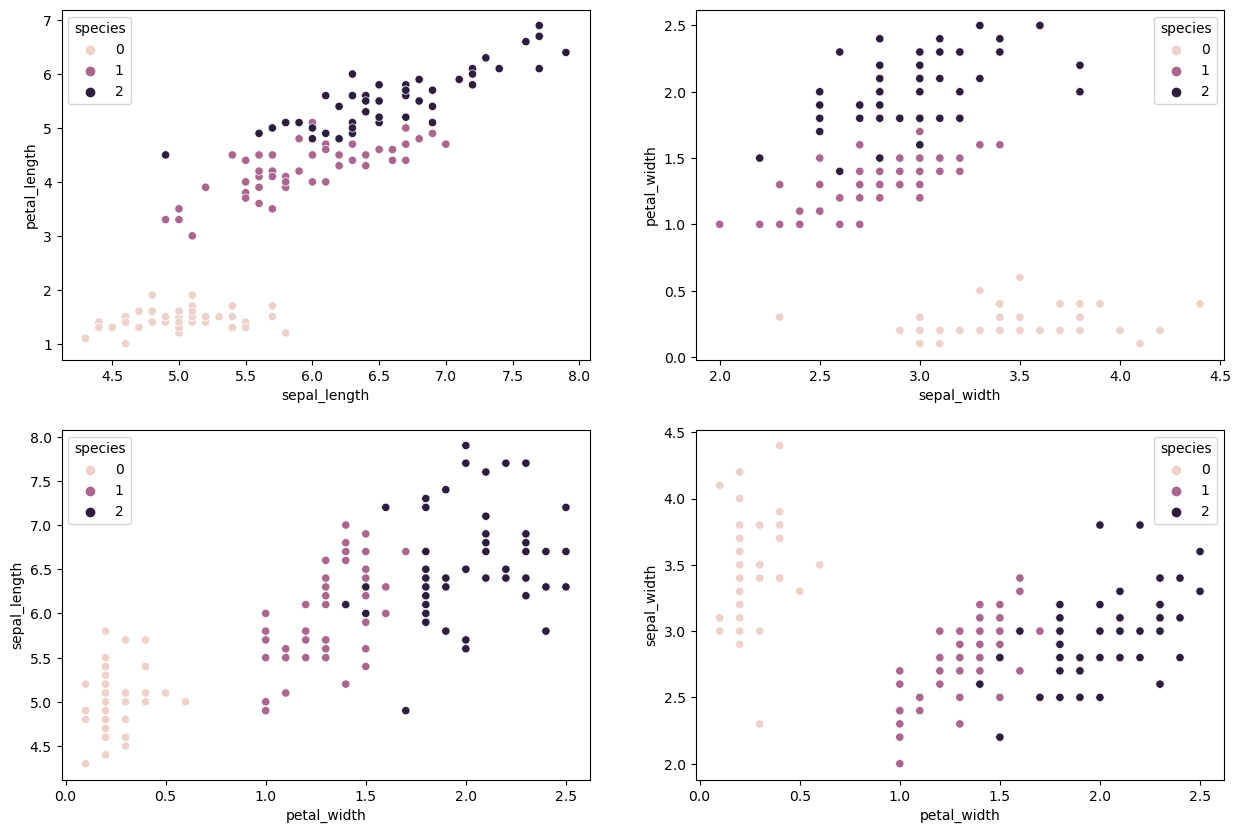

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length',y='petal_length',hue ="species",data=df)
plt.subplot(2,2,2)
sns.scatterplot(x='sepal_width',y='petal_width',hue ="species",data=df)
plt.subplot(2,2,3)
sns.scatterplot(x='petal_width',y='sepal_length',hue ="species",data=df)
plt.subplot(2,2,4)
sns.scatterplot(x='petal_width',y='sepal_width',hue ="species",data=df)

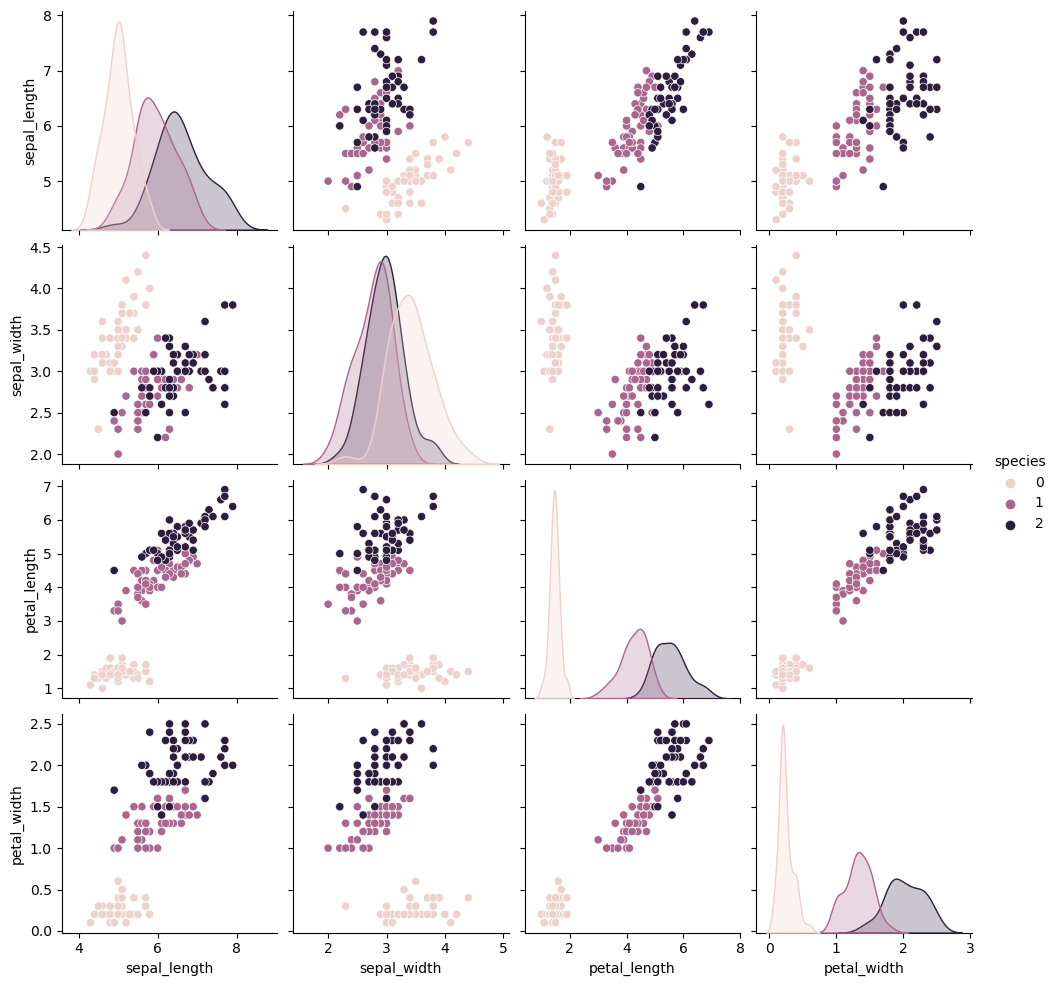

In [37]:
sns.pairplot(df, hue='species')


In [38]:
##model training
X = df[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
y = df.species

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=105) 

In [48]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
103,6.3,2.9,5.6,1.8
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3
38,4.4,3.0,1.3,0.2
53,5.5,2.3,4.0,1.3


In [49]:
X_train.shape

(90, 4)

In [50]:
y_train.shape

(90,)

In [51]:
y_train.head()

103    2
140    2
45     0
38     0
53     1
Name: species, dtype: int64

In [52]:
#Using LogisticRegression
#model1
model1 = LogisticRegression()

model1.fit(X_train,y_train )

prediction = model1.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9833333333333333


Text(0, 0.5, 'y_pred')

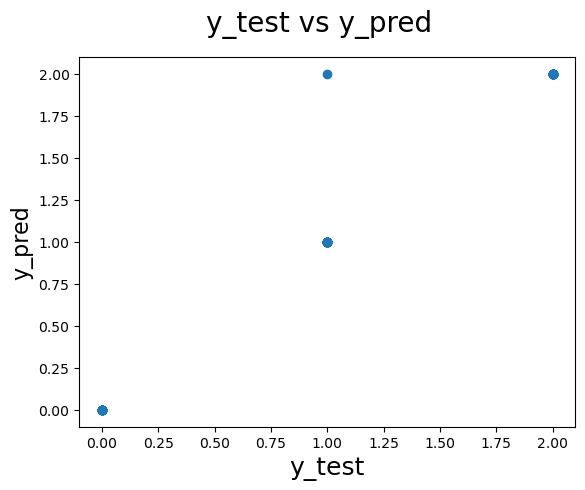

In [53]:
fig = plt.figure()
plt.scatter(y_test,prediction)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [54]:
## model 2 using support vector
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train)

prediction2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,prediction2))

Acc= 1.0


In [55]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)

print(classification_report(y_test,prediction2))

Confusion matrix: 
 [[15  0  0]
 [ 0 19  1]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [56]:
y_test

110    2
56     1
81     1
84     1
55     1
145    2
40     0
33     0
131    2
82     1
43     0
13     0
68     1
71     1
77     1
114    2
5      0
144    2
67     1
9      0
143    2
104    2
101    2
49     0
120    2
108    2
142    2
107    2
109    2
44     0
79     1
64     1
23     0
118    2
97     1
34     0
42     0
57     1
48     0
91     1
105    2
65     1
92     1
141    2
146    2
96     1
26     0
137    2
129    2
125    2
99     1
149    2
115    2
6      0
3      0
100    2
69     1
112    2
113    2
72     1
Name: species, dtype: int64

In [57]:
prediction

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1], dtype=int64)

In [58]:
## model 3 using decision tree
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9666666666666667


In [59]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

confusion_mat = confusion_matrix(y_test,y_pred3)
print("Confusion matrix: \n",confusion_mat)

print(classification_report(y_test,y_pred3))

Confusion matrix: 
 [[15  0  0]
 [ 0 19  1]
 [ 0  1 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.95      0.95        20
           2       0.96      0.96      0.96        25

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [60]:
## prediction on input data
input_data = input("Enter values as:")
list  = input_data.split(",")
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(list)
print(input_data_as_numpy_array) 
#reshapr the data
reshaped_data = input_data_as_numpy_array.reshape(1,-1)
#debug
print(reshaped_data)

prediction = model2.predict(reshaped_data)
print(prediction)

Enter values as:8.0,0.5,3.2,0.1
['8.0' '0.5' '3.2' '0.1']
[['8.0' '0.5' '3.2' '0.1']]
[1]
